In [1]:
library (ggplot2)
library (tidyverse)
library(tidymodels)
library(dplyr)
set.seed (42)


hungary <- read_csv ("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", col_names = FALSE)
colnames(hungary) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

switzerland<- read_csv ("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data", col_names = FALSE)
colnames(switzerland) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

cleveland<- read_csv ("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE)
colnames(cleveland) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

va<- read_csv ("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data", col_names = FALSE)
colnames(va) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

heart_data <- rbind (hungary,switzerland,cleveland,va)
#clean and summarize data by selecting 5 out of 14 variables 
#summarize the values for num to a binary variable -> now we only distinguish whether a person has a heart disease or not 
#change col_types
heart_data_cleaned <- heart_data %>%
  select('age', 'sex', 'trestbps', 'chol', 'fbs', 'num') 
heart_data_cleaned <- subset (heart_data_cleaned, fbs != "?")
heart_data_cleaned <- subset (heart_data_cleaned, chol != "?")
heart_data_cleaned$num [heart_data_cleaned$num == "2"] <- "1"
heart_data_cleaned$num [heart_data_cleaned$num == "3"] <- "1"
heart_data_cleaned$num [heart_data_cleaned$num == "4"] <- "1"
heart_data_cleaned <- mutate (heart_data_cleaned, trestbps = as.numeric (trestbps))
heart_data_cleaned <- mutate (heart_data_cleaned, chol = as.numeric (chol))
heart_data_cleaned <- mutate (heart_data_cleaned, fbs = as_factor (fbs))
heart_data_cleaned <- mutate (heart_data_cleaned, num = as_factor(num))
heart_data_cleaned <- mutate (heart_data_cleaned, sex = as_factor(sex))
heart_data_cleaned

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ 

age,sex,trestbps,chol,fbs,num
<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
28,1,130,132,0,0
29,1,120,243,0,0
30,0,170,237,0,0
31,0,100,219,0,0
32,0,105,198,0,0
32,1,110,225,0,0
32,1,125,254,0,0
33,1,120,298,0,0
34,0,130,161,0,0


Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 55 rows containing missing values (geom_point).”


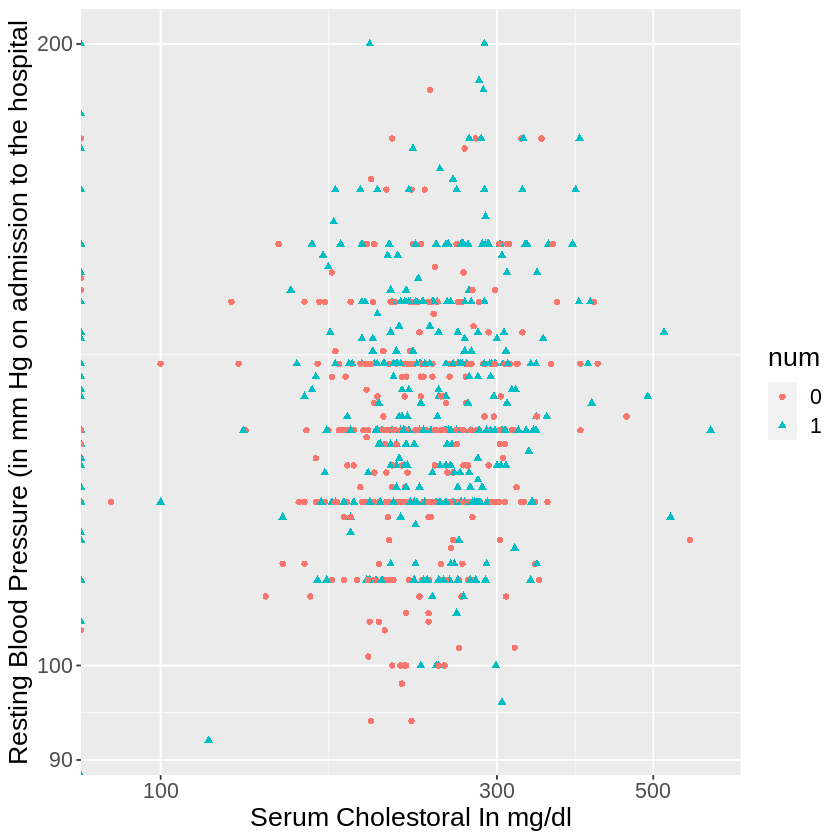

In [2]:
chol_vs_trestbps <- heart_data_cleaned |>
    ggplot(aes(x=chol,y=trestbps,color = num,shape=num))+
    geom_point()+
    xlab("Serum Cholestoral In mg/dl")+
    ylab("Resting Blood Pressure (in mm Hg on admission to the hospital")+
    theme(text = element_text(size = 16))+
    scale_x_log10(labels = comma) +
    scale_y_log10(labels = comma) 
chol_vs_trestbps

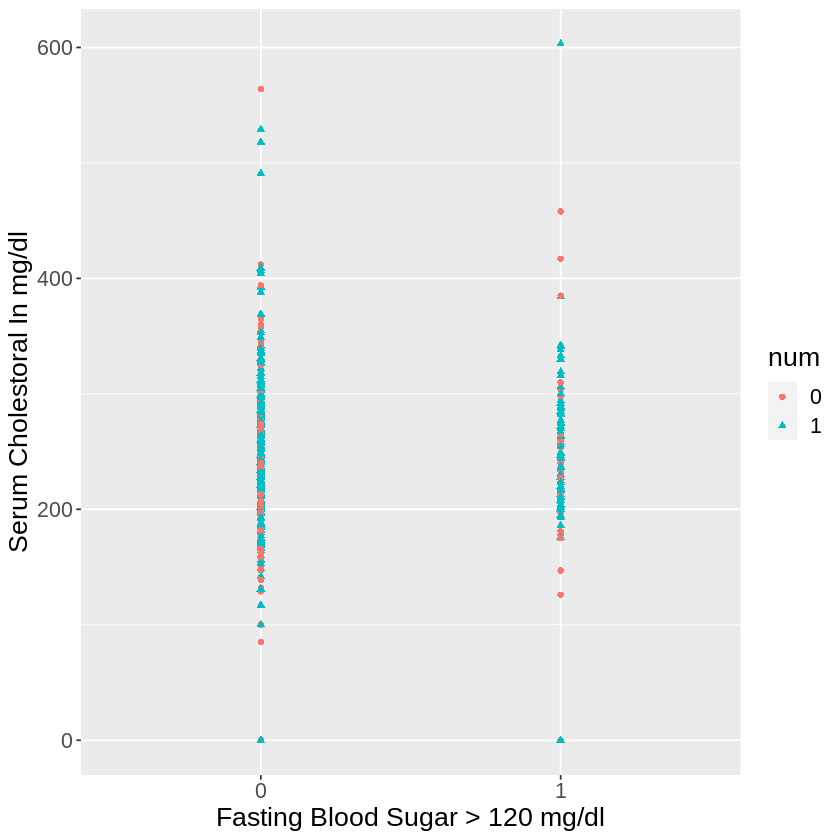

In [3]:
fbs_vs_chol <- heart_data_cleaned |>
    ggplot(aes(x=fbs,y=chol,color = num,shape=num))+
    geom_point()+
    xlab("Fasting Blood Sugar > 120 mg/dl")+
    ylab("Serum Cholestoral In mg/dl")+
    theme(text = element_text(size = 16))
fbs_vs_chol

Warning message:
“Removed 55 rows containing missing values (geom_point).”


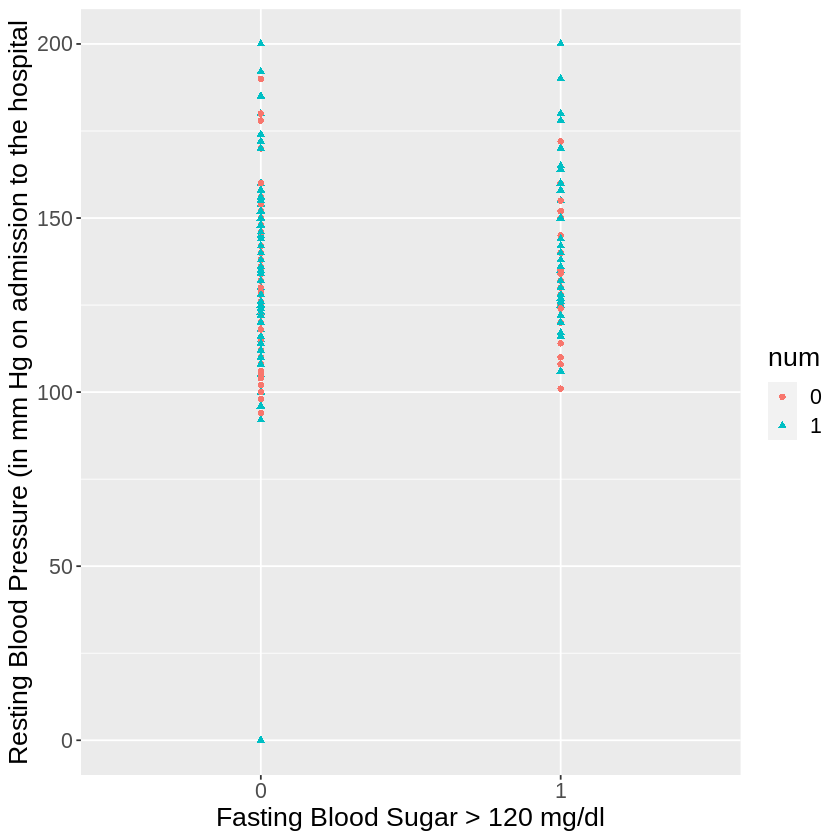

In [4]:
fbs_vs_trestbps <- heart_data_cleaned |>
    ggplot(aes(x=fbs,y=trestbps,color = num,shape=num))+
    geom_point()+
    xlab("Fasting Blood Sugar > 120 mg/dl")+
    ylab("Resting Blood Pressure (in mm Hg on admission to the hospital")+
    theme(text = element_text(size = 16))
fbs_vs_trestbps

In [ ]:
gfh